# Application: Risque de crédit

Avant de commencer notre prochain exercice qui consiste à analyser des données de crédit, essayons d'abord de comprendre ce que c'est le risque de crédit. 


```{epigraph}
Le risque de crédit est le risque qu'un emprunteur ne rembourse pas tout ou une partie de son crédit aux échéances prévues par le contrat signé entre lui et l'organisme préteur (généralement une banque).

-- Wikipédia
```

Dans notre cas, il s'agit d'une banque qui agit en tant qu'organisme financier et qui accorde des prêts aux clients qui en font la demande. Par conséquent, les clients susceptibles de **ne pas rembourser** leur prêt représentent un risque de crédit pour la banque.

En analysant les données des clients et avant même d'y appliqer une quelconque inférence, la banque sera en mesure d'avoir une idée sur le profl des clients qui peuvent présenter un risque de crédit potentiel. 

Cela permettra d'atténuer les risques et de minimiser les pertes en évitant d'accorder des prêts à des clients qui pourraient présenter des risques de crédit pour la banque.

In [2]:
# install.packages("rchallenge")

In [3]:
library(rchallenge)

In [3]:
data("german")

In [4]:
head(german)

status              duration credit_history                             
1 no checking account 18       all credits at this bank paid back duly    
2 no checking account  9       all credits at this bank paid back duly    
3 ... < 0 DM          12       no credits taken/all credits paid back duly
4 no checking account 12       all credits at this bank paid back duly    
5 no checking account 12       all credits at this bank paid back duly    
6 no checking account 10       all credits at this bank paid back duly    
  purpose    amount savings                    employment_duration
1 car (used) 1049   unknown/no savings account < 1 yr             
2 others     2799   unknown/no savings account 1 <= ... < 4 yrs   
3 retraining  841   ... <  100 DM              4 <= ... < 7 yrs   
4 others     2122   unknown/no savings account 1 <= ... < 4 yrs   
5 others     2171   unknown/no savings account 1 <= ... < 4 yrs   
6 others     2241   unknown/no savings account < 1 yr             
  installment_rate personal_status_sex                  other_debtors ...
1 < 20             female : non-single or male : single none          ...
2 25 <= ... < 35   male : married/widowed               none          ...
3 25 <= ... < 35   female : non-single or male : single none          ...
4 20 <= ... < 25   male : married/widowed               none          ...
5 < 20             male : married/widowed               none          ...
6 >= 35            male : married/widowed               none          ...
  property              age other_installment_plans housing  number_credits
1 car or other          21  none                    for free 1             
2 unknown / no property 36  none                    for free 2-3           
3 unknown / no property 23  none                    for free 1             
4 unknown / no property 39  none                    for free 2-3           
5 car or other          38  bank                    rent     2-3           
6 unknown / no property 48  none                    for free 2-3           
  job                       people_liable telephone foreign_worker credit_risk
1 skilled employee/official 0 to 2        no        no             good       
2 skilled employee/official 3 or more     no        no             good       
3 unskilled - resident      0 to 2        no        no             good       
4 unskilled - resident      3 or more     no        yes            good       
5 unskilled - resident      0 to 2        no        yes            good       
6 unskilled - resident      3 or more     no        yes            good

In [5]:
dim(german)

[1] 1000   21

À partir de la sortie précédente, vous pouvez voir que notre ensemble de données a un total de 1000 obbservations, où chacune traite des points de données relatifs à un client de la banque. 

Chaque observation possède divers attributs décrivant les données et nous avons un total de 21 variable. 

In [6]:
colnames(german)

[1] "status"                  "duration"               
 [3] "credit_history"          "purpose"                
 [5] "amount"                  "savings"                
 [7] "employment_duration"     "installment_rate"       
 [9] "personal_status_sex"     "other_debtors"          
[11] "present_residence"       "property"               
[13] "age"                     "other_installment_plans"
[15] "housing"                 "number_credits"         
[17] "job"                     "people_liable"          
[19] "telephone"               "foreign_worker"         
[21] "credit_risk"

Dans la prochaine section, nous étudions plus en détail chacune de ces variables.

# Prétraitement des données

Dans cette section, nous allons nous concentrer sur le prétraitement des données, qui comprend le nettoyage, la transformation et la normalisation des données si nécessaire. En fait, nous effectuons des opérations pour préparer les données à la modélisation.

## Les valeurs manquantes

Dans certaines situations, les données que vous traitez comportent des valeurs manquantes, qui sont souvent représentées par `NA` dans R. 

vérifions si les données contiennent des valeurs `NA`

In [8]:
sum(is.na(german))

[1] 0

## Types de données

In [9]:
str(german)

'data.frame':	1000 obs. of  21 variables:
 $ status                 : Factor w/ 4 levels "no checking account",..: 1 1 2 1 1 1 1 1 4 2 ...
 $ duration               : int  18 9 12 12 12 10 8 6 18 24 ...
 $ credit_history         : Factor w/ 5 levels "delay in paying off in the past",..: 5 5 3 5 5 5 5 5 5 3 ...
 $ purpose                : Factor w/ 11 levels "others","car (new)",..: 3 1 10 1 1 1 1 1 4 4 ...
 $ amount                 : int  1049 2799 841 2122 2171 2241 3398 1361 1098 3758 ...
 $ savings                : Factor w/ 5 levels "unknown/no savings account",..: 1 1 2 1 1 1 1 1 1 3 ...
 $ employment_duration    : Factor w/ 5 levels "unemployed","< 1 yr",..: 2 3 4 3 3 2 4 2 1 1 ...
 $ installment_rate       : Ord.factor w/ 4 levels ">= 35"<"25 <= ... < 35"<..: 4 2 2 3 4 1 1 2 4 1 ...
 $ personal_status_sex    : Factor w/ 4 levels "male : divorced/separated",..: 2 3 2 3 3 3 3 3 2 2 ...
 $ other_debtors          : Factor w/ 3 levels "none","co-applicant",..: 1 1 1 1 1 1 1 1 1 1 ...

Nous avons généralement deux types de variables :

- **Les variables numériques** : Les valeurs de ces variables ont une signification mathématique. Cela signifie que vous pouvez effectuer des opérations mathématiques, telles que des additions, des soustractions, etc. L'âge, le poids, etc. d'une personne en sont des exemples.

* duration : durée en mois.
* amount : montant du crédit.
* installment_rate : taux de remboursement en pourcentage du revenu disponible.
* present_residence : résidence actuelle depuis .
* age : âge du client.
* number_credits : nombre de crédits existants dans cette banque.
* other_debtors : nombre de personnes tenues d'assurer le prêt.

In [20]:
library(dplyr)

In [21]:
german %>%
    select(duration,
           amount,
           installment_rate,
           present_residence,
           age,
           number_credits,
           other_debtors) %>%
    str()

'data.frame':	1000 obs. of  7 variables:
 $ duration         : int  18 9 12 12 12 10 8 6 18 24 ...
 $ amount           : int  1049 2799 841 2122 2171 2241 3398 1361 1098 3758 ...
 $ installment_rate : Ord.factor w/ 4 levels ">= 35"<"25 <= ... < 35"<..: 4 2 2 3 4 1 1 2 4 1 ...
 $ present_residence: Ord.factor w/ 4 levels "< 1 yr"<"1 <= ... < 4 yrs"<..: 4 2 4 2 4 3 4 4 4 4 ...
 $ age              : int  21 36 23 39 38 48 39 40 65 23 ...
 $ number_credits   : Ord.factor w/ 4 levels "1"<"2-3"<"4-5"<..: 1 2 1 2 2 2 2 1 2 1 ...
 $ other_debtors    : Factor w/ 3 levels "none","co-applicant",..: 1 1 1 1 1 1 1 1 1 1 ...


- **Variables catégorielles** : Les valeurs de ces variables n'ont aucune signification mathématique et vous ne pouvez effectuer aucune opération mathématique sur elles. Chaque valeur de cette variable appartient à une classe ou à uneclasse ou catégorie spécifique. Le sexe d'une personne, son emploi, etc. en sont des exemples.

 * credit_risk: Une variable binaire indiquant le risque de crédit ou la solvabilité avec les niveaux Bon et Mauvais. 
* telephone : variable binaire indiquant si le client a un numéro de téléphone enregistré.
* foreign_worker : variable binaire indiquant si le client est un travailleur étranger.
* status : variable factorielle indiquant le statut du compte courant.
* credit_history : variable factorielle indiquant l'historique de crédit.
* purpose : variable factorielle indiquant le motif du crédit.
* savings : variable factorielle indiquant le compte d'épargne/les obligations.
* employment_duration : facteur ordonné indiquant la durée de l'emploi actuel.
* personal_status_sex : variable factorielle indiquant le statut personnel et le sexe.
* people_liable : variable factorielle indiquant les autres débiteurs.
* property : variable factorielle indiquant le bien le plus précieux du client.
* other_installment_plans : variable factorielle indiquant les autres plans de paiement.
* housing : variable factorielle indiquant le logement
* job : facteur indiquant la situation professionnelle


In [22]:
german %>%
    select(credit_risk,
           telephone,
           foreign_worker,
           status,
           credit_history,
           purpose,
           savings,
          employment_duration,
          personal_status_sex,
          people_liable,
          property,
          other_installment_plans,
          housing,
          job) %>%
    str()

'data.frame':	1000 obs. of  14 variables:
 $ credit_risk            : Factor w/ 2 levels "bad","good": 2 2 2 2 2 2 2 2 2 2 ...
 $ telephone              : Factor w/ 2 levels "no","yes (under customer name)": 1 1 1 1 1 1 1 1 1 1 ...
 $ foreign_worker         : Factor w/ 2 levels "yes","no": 2 2 2 1 1 1 1 1 2 2 ...
 $ status                 : Factor w/ 4 levels "no checking account",..: 1 1 2 1 1 1 1 1 4 2 ...
 $ credit_history         : Factor w/ 5 levels "delay in paying off in the past",..: 5 5 3 5 5 5 5 5 5 3 ...
 $ purpose                : Factor w/ 11 levels "others","car (new)",..: 3 1 10 1 1 1 1 1 4 4 ...
 $ savings                : Factor w/ 5 levels "unknown/no savings account",..: 1 1 2 1 1 1 1 1 1 3 ...
 $ employment_duration    : Factor w/ 5 levels "unemployed","< 1 yr",..: 2 3 4 3 3 2 4 2 1 1 ...
 $ personal_status_sex    : Factor w/ 4 levels "male : divorced/separated",..: 2 3 2 3 3 3 3 3 2 2 ...
 $ people_liable          : Factor w/ 2 levels "3 or more","0 to 2": 2 1 2 1 

# Analyse et transformation des données

Maintenant que nous avons traité nos données, elles sont prêtes à être analysées. Comme nous l'avons mentionné précédemment, nous allons procéder à une **analyse descriptive et exploratoire** dans cette section. 

Nous analyserons les **différents attributs** de l'ensemble de données et parlerons de leur **signification** et de leur **relation avec l'attribut de risque de crédit**. Nous utiliserons des **fonctions statistique** et des **visualisations** pour illustrer tout cela.

## La variable réponse

Étudions d'abord la variable d'intérêt que la banque veut prédire pour un futur client.

In [29]:
table(german$credit_risk)


 bad good 
 300  700 

Selon ce résultat de solvabilité, on voit qu'il y a plus de personnes présentant un bon risque que de personnes présentant un mauvais risque. En fait, 70 % des demandeurs présentent un bon risque de crédit, tandis qu'environ 30 % présentent un mauvais risque de crédit.

Créons ensuite un graphique qui illustre rapidement ces proportions. Nous aurons besoin du package `ggplot2` et bien sur un data frame qui sera utilisé pour ce graphique;

In [26]:
german %>% 
  count(credit_risk) 

credit_risk n  
1 bad         300
2 good        700

In [27]:
german %>% 
  count(credit_risk) %>% 
  mutate(perc = n / nrow(german))

credit_risk n   perc
1 bad         300 0.3 
2 good        700 0.7

In [28]:
Class.prop <- german %>% 
  count(credit_risk) %>% 
  mutate(perc = n / nrow(german)) 

Ici il faut être prudent, les classes ne sont pas équilibrées et, si une analyse ultérieure impliquant des modèles d'apprentissage statistique sera appliqué, la division des données en un ensemble d'apprentissage et un ensemble de test doit être effectuée à l'aide d'une méthode d'échantillonnage aléatoire stratifiée.

In [32]:
library(ggplot2)

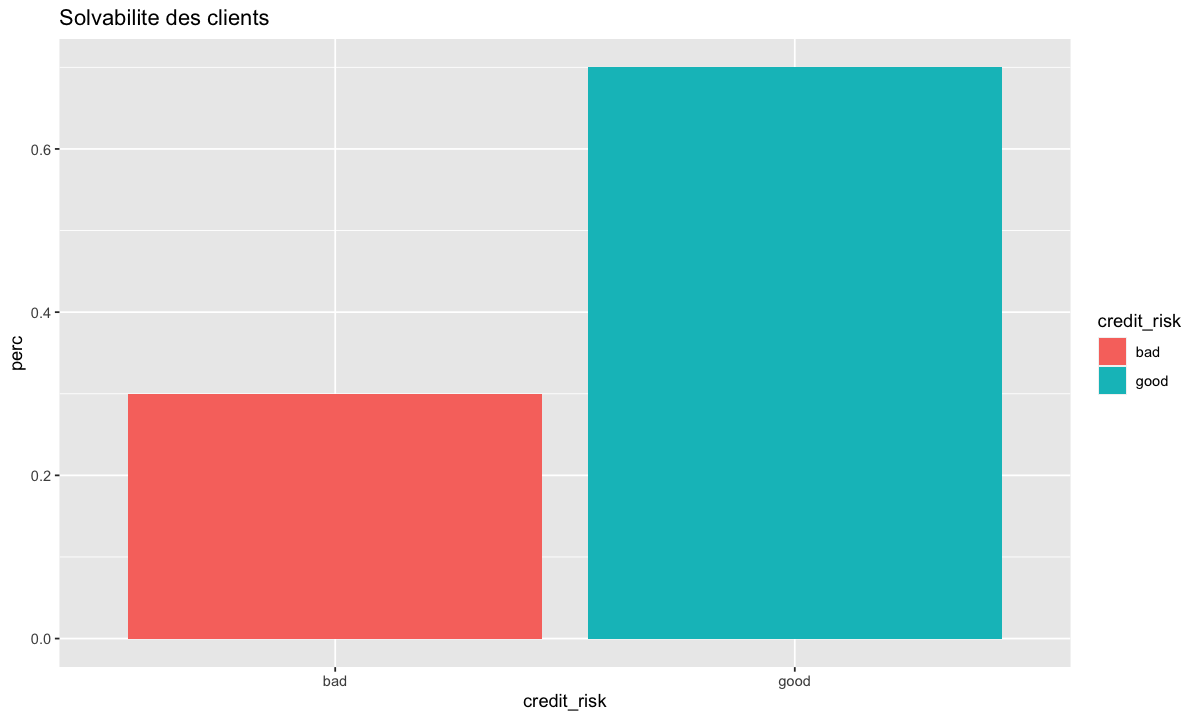

In [35]:
options(repr.plot.width=10, repr.plot.height=6)
Class.prop %>%
 ggplot(aes(x=credit_risk,y= perc,fill=credit_risk))+
 geom_bar(stat="identity") +
 labs(title="Solvabilite des clients")

## Les variables numériques

Pour recueillir l'information d'un ensemble de réponses, il faut utiliser le bon mécanisme d'agrégation. Pour estimer des quantités numériques, des techniques standard telles que le tracé de la distribution de fréquence et le calcul de statistiques sommaires sont appropriées. La moyenne et la médiane supposent implicitement que les erreurs sont distribuées de manière symétrique. Un rapide coup d'œil à la forme de la distribution permet généralement de confirmer ou de rejeter cette hypothèse.

La médiane est, en général, un choix plus approprié que la moyenne dans de tels problèmes d'agrégation. Elle réduit l'influence des valeurs aberrantes, ce qui est un problème particulier dans le cas d'expériences de masse où une certaine fraction de vos participants sont susceptibles d'être des abrutis.

Pour cela, nous allons analyser ce variables numérique en traçant, boxplot ou la densité pourchacune de ces varaibles numériques afin mieux comprendre certaines relations.

### Âge

In [37]:
summary(german$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.00   27.00   33.00   35.54   42.00   75.00 

Traçons un graphique qui nous permet de comparer la médiane de l'âge sur les montants d'emprunt séparé les mauvais crédits vs de bons crédits;

Pour ce faire, nous devons nous baser sur un data frame en utilisant la fonction `reshape2::melt()`. Cette fonction prend une colonne de notre dataframe (dans ce cas `credit_risk`) et transforme cette cette colonne DEUX colonnes : Une colonne nommée variable et une colonne nommée valeur.

In [45]:
german %>%
    select(credit_risk, age) %>%
    head()

credit_risk age
1 good        21 
2 good        36 
3 good        23 
4 good        39 
5 good        38 
6 good        48

In [46]:
german %>%
    select(credit_risk, age) %>%
    reshape2::melt()%>%
    head()

Using credit_risk as id variables



credit_risk variable value
1 good        age      21   
2 good        age      36   
3 good        age      23   
4 good        age      39   
5 good        age      38   
6 good        age      48

Using credit_risk as id variables



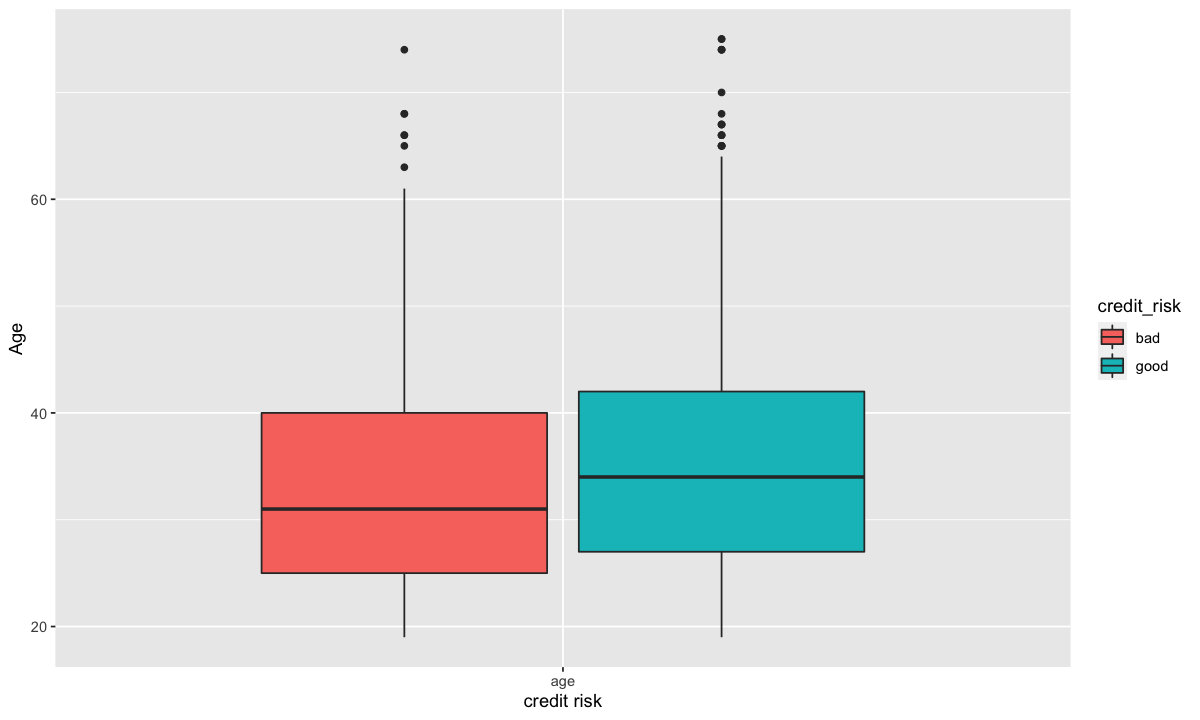

In [44]:
german %>%
    select(credit_risk, age) %>%
    reshape2::melt()%>%
    ggplot(aes(x = variable, y = value, fill = credit_risk)) + 
      geom_boxplot() +
      xlab("credit risk") +
      ylab("Age")

### Durée et montant de crédit

Regardons maintenant la durée des emprunts et le montant de crédit pour chcune des catégorie d'emprunt. Et comparons la densité de chacune de ces deux catégorie pour les deux variables. 

À cette densité, nous y ajoutons la moyenne qui nous permet de comparer le mauvais risque par rapport au bon risque.

Pour ce faire, créons un data frame qui somarise la moyenne de ces deux mesures pour chacune des variable;

In [72]:
avg.duration <- german %>%
  select(duration, credit_risk) %>%
  group_by(credit_risk) %>%
  summarise(m=mean(duration))

`summarise()` ungrouping output (override with `.groups` argument)



In [52]:
avg.duration

credit_risk m       
1 bad         24.86000
2 good        19.20714

In [74]:
avg.amount <- german %>%
  select(amount, credit_risk) %>%
  group_by(credit_risk) %>%
  summarise(m=mean(amount))

`summarise()` ungrouping output (override with `.groups` argument)



traçons maintenant les deux densité avec leurs moyennes respectives;

In [75]:
duration_p<-german%>% 
  ggplot(aes(duration))+
  geom_density(aes(fill=credit_risk),alpha=0.7) + 
  geom_vline(data=avg.duration,aes(xintercept= m , colour= credit_risk), lty = 4 ,size=2)+
  labs(title="Duree en mois groupes par solvabilite",            
       x="Duree",
       fill="Solvabilite")

In [87]:
amount_p<-german%>% 
  ggplot(aes(amount))+
  geom_density(aes(fill=credit_risk),alpha=0.7) + 
  geom_vline(data=avg.amount,aes(xintercept= m , colour= credit_risk), lty = 4 ,size=2)+
  labs(title="Montant de credit en $ groupes par solvabilite",            
       x="Montant",
       fill="Solvabilite")

In [88]:
library(gridExtra)

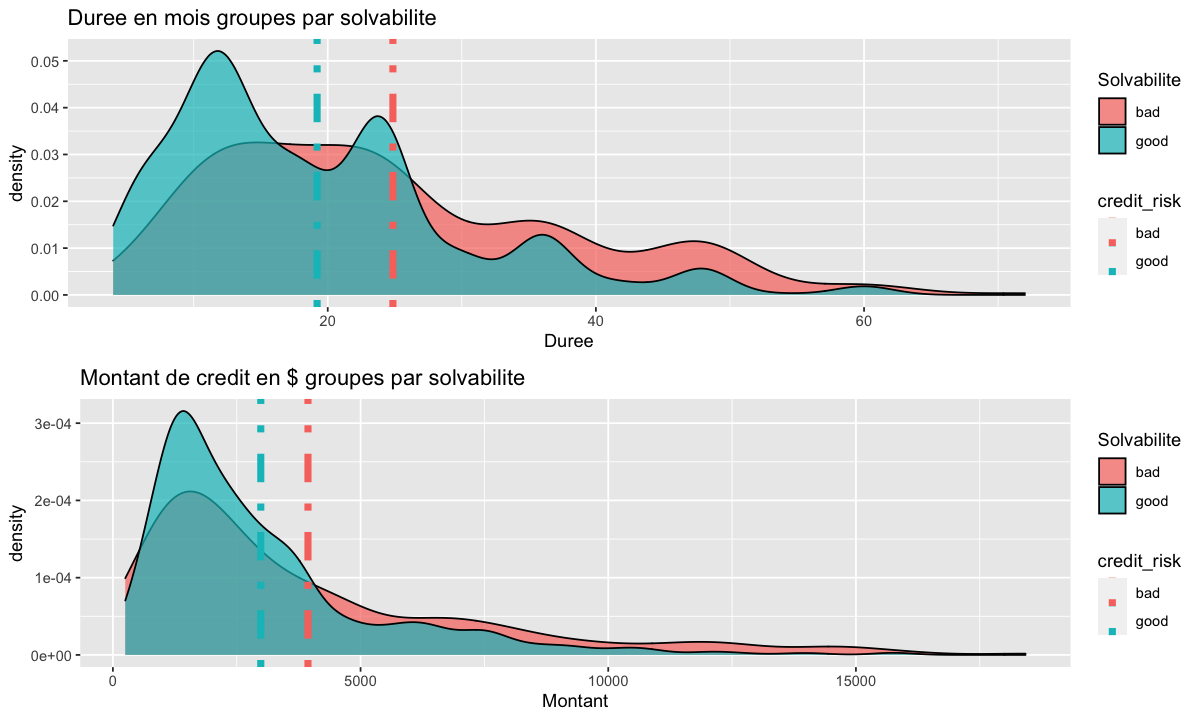

In [89]:
grid.arrange(duration_p,amount_p)

En traçant leur courbe de densité le long de la ligne verticale de leur valeur moyenne, nous observons que ni la durée en mois ni le montant du crédit ne sont normalement distribués. Les données ont tendance à présenter une distribution asymétrique, en particulier pour la variable Montant du crédit.

In [96]:
duration_bp<-german %>%
    select(duration, credit_risk) %>%
    reshape2::melt()%>%
    ggplot(aes(x = variable, y = value, fill = credit_risk)) + 
      geom_boxplot() +
      xlab("Solvabilite") +
      ylab("Duration")

Using credit_risk as id variables



In [97]:
montant_bp<-german %>%
    select(amount, credit_risk) %>%
    reshape2::melt()%>%
    ggplot(aes(x = variable, y = value, fill = credit_risk)) + 
      geom_boxplot() +
      xlab("credit risk") +
      ylab("Amount")

Using credit_risk as id variables



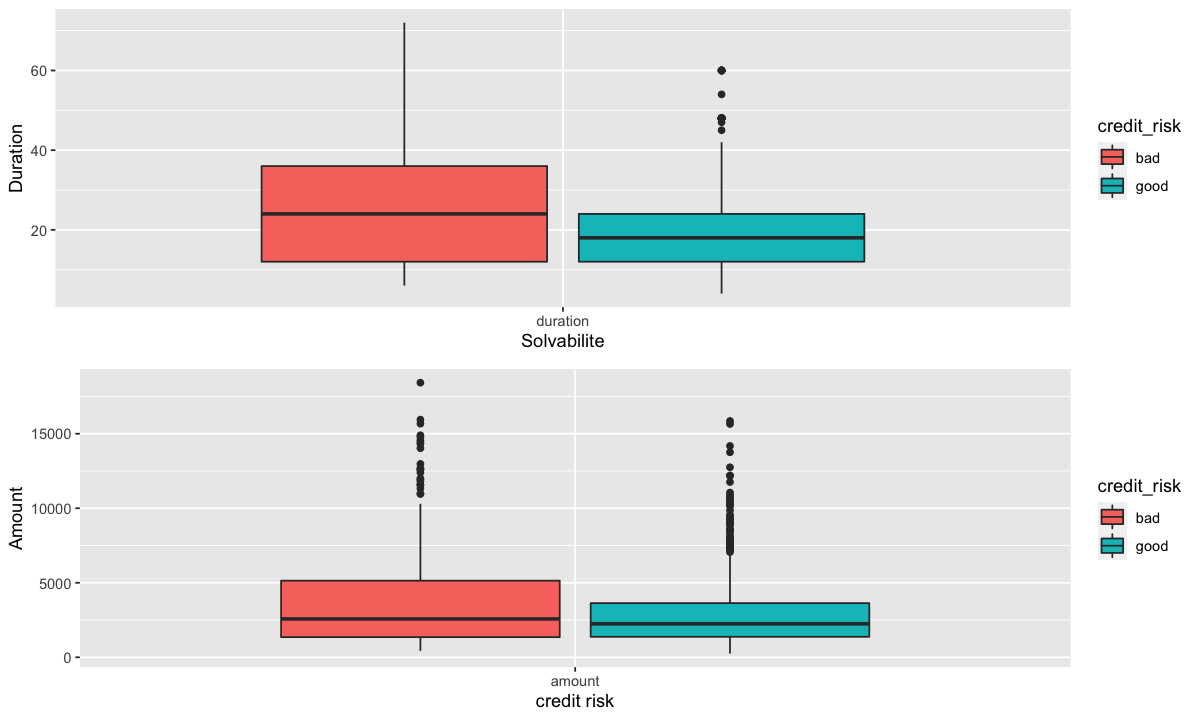

In [99]:
grid.arrange(duration_bp,montant_bp)

La durée en mois ainsi que le montant du crédit, semblent montrer une valeur médiane plus élevée pour le mauvais risque par rapport au bon risque. De même, l'intervalle de ces deux variables est plus large pour les observations à mauvais risque que pour les bons. 

### Remboursement du prêt

Cette variable possède 4 catégories;  `>= 35`,  `25 <= ... < 35`,  `20 <= ... < 25` et `< 20`. 

In [101]:
table(german$installment_rate)


         >= 35 25 <= ... < 35 20 <= ... < 25           < 20 
           136            231            157            476 

Traços un diagramme en bâtons du remboursement groupé par les deux catégorie de solvabilité, soient le bon crédit et le mauvais crédit;

In [113]:
installment_rate_p<-german %>% 
  ggplot(aes(installment_rate, ..count..)) + 
  geom_bar(aes(fill=credit_risk), position ="dodge")+
  labs(title="Pourcentage du taux de remboursement groupé par solvabilité")

In [115]:
installment_rate_bp<-german %>%
    select(credit_risk, installment_rate, amount) %>%
    ggplot(aes(x=installment_rate, y=amount, fill=credit_risk)) + geom_boxplot()

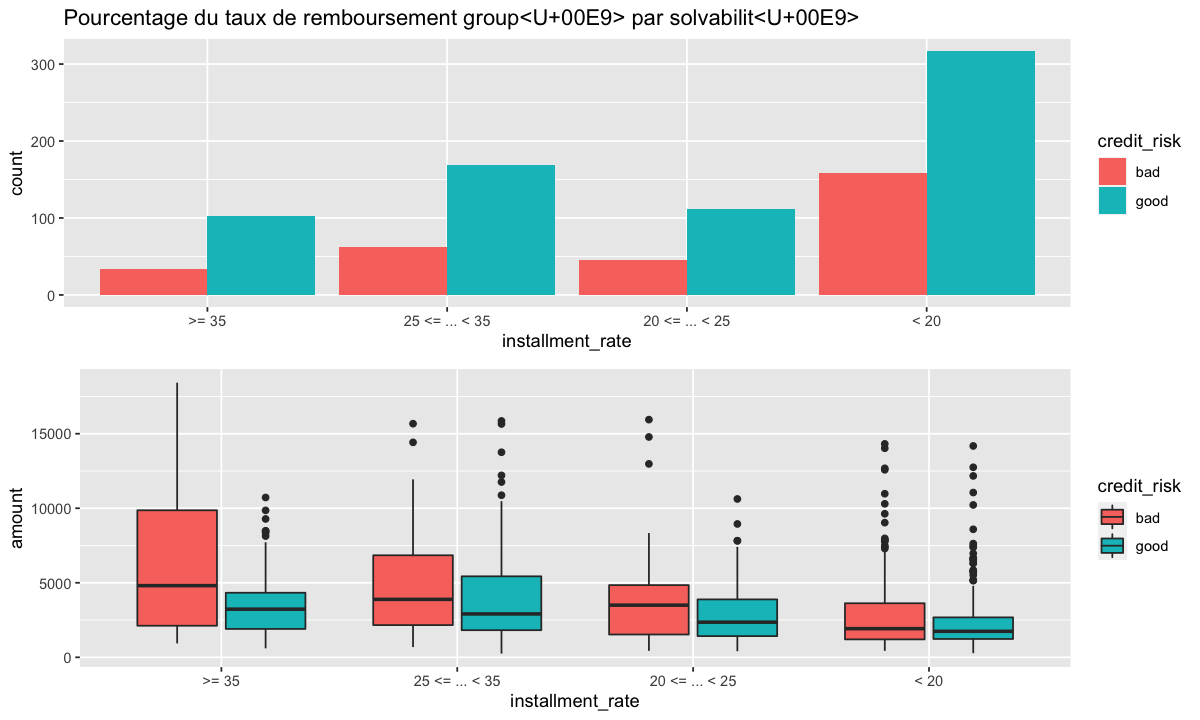

In [116]:
grid.arrange(installment_rate_p,installment_rate_bp)

Le diagramme en bâtons du taux de versement montre une différence significative entre les bons et les mauvais risques de crédit. Le nombre de bons dossiers semble être le double des mauvais dossiers. Le Box plot révèle que la valeur médiane des mauvais dossiers est plus élevée que celle des bons dossiers, même si les deux classes semblent avoir le même intervalle.

### Nombre de crédits, Résidence et débiteurs

In [135]:
number_credits_p<-german %>% 
  ggplot(aes(number_credits, ..count..)) + 
  geom_bar(aes(fill=credit_risk), position ="dodge")+
  labs(title="Credits existants groupés par solvabilité")

present_residence_p<-german %>% 
  ggplot(aes(present_residence, ..count..)) + 
  geom_bar(aes(fill=credit_risk), position ="dodge")+
  labs(title="Résidence actuelle groupés par solvabilité")

other_debtors_p<-german %>% 
  ggplot(aes(other_debtors, ..count..)) + 
  geom_bar(aes(fill=credit_risk), position ="dodge")+
  labs(title="Résidence actuelle groupés par solvabilité")

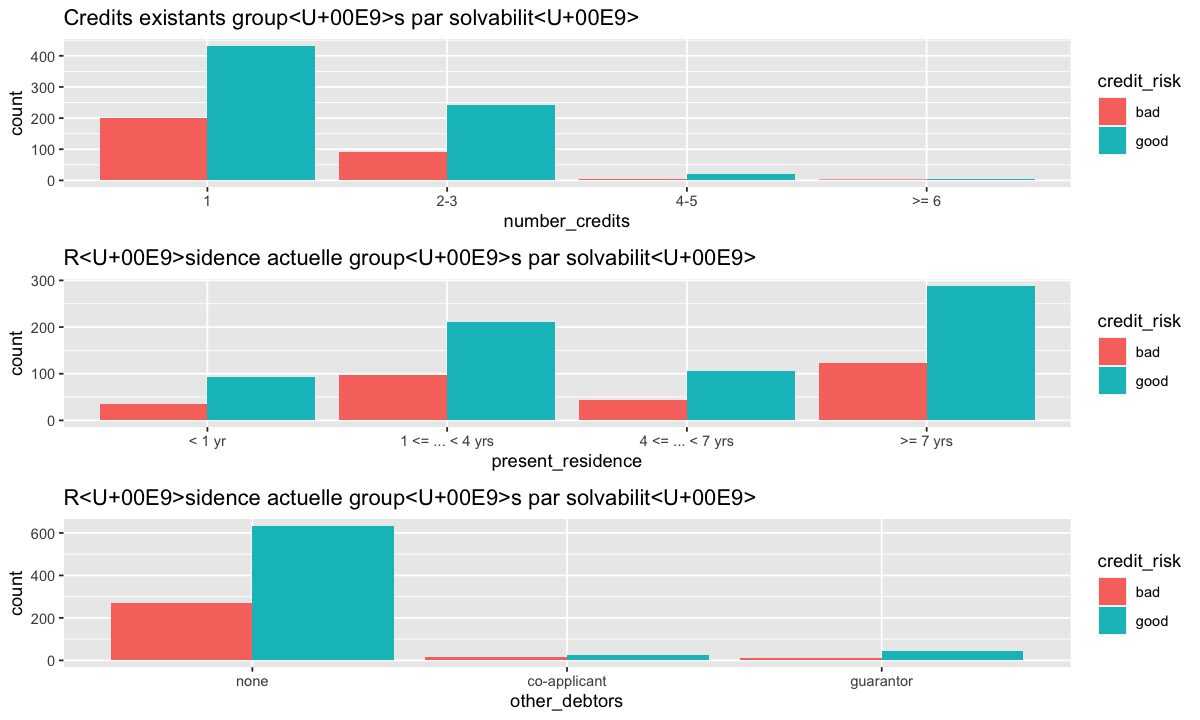

In [136]:
grid.arrange(number_credits_p,present_residence_p,other_debtors_p)

In [139]:
number_credits_bp<-german %>%
    select(credit_risk, number_credits, amount) %>%
    ggplot(aes(x=number_credits, y=amount, fill=credit_risk)) + geom_boxplot()

present_residence_bp<-german %>%
    select(credit_risk, present_residence, amount) %>%
    ggplot(aes(x=present_residence, y=amount, fill=credit_risk)) + geom_boxplot()

other_debtors_bp<-german %>%
    select(credit_risk, other_debtors, amount) %>%
    ggplot(aes(x=other_debtors, y=amount, fill=credit_risk)) + geom_boxplot()

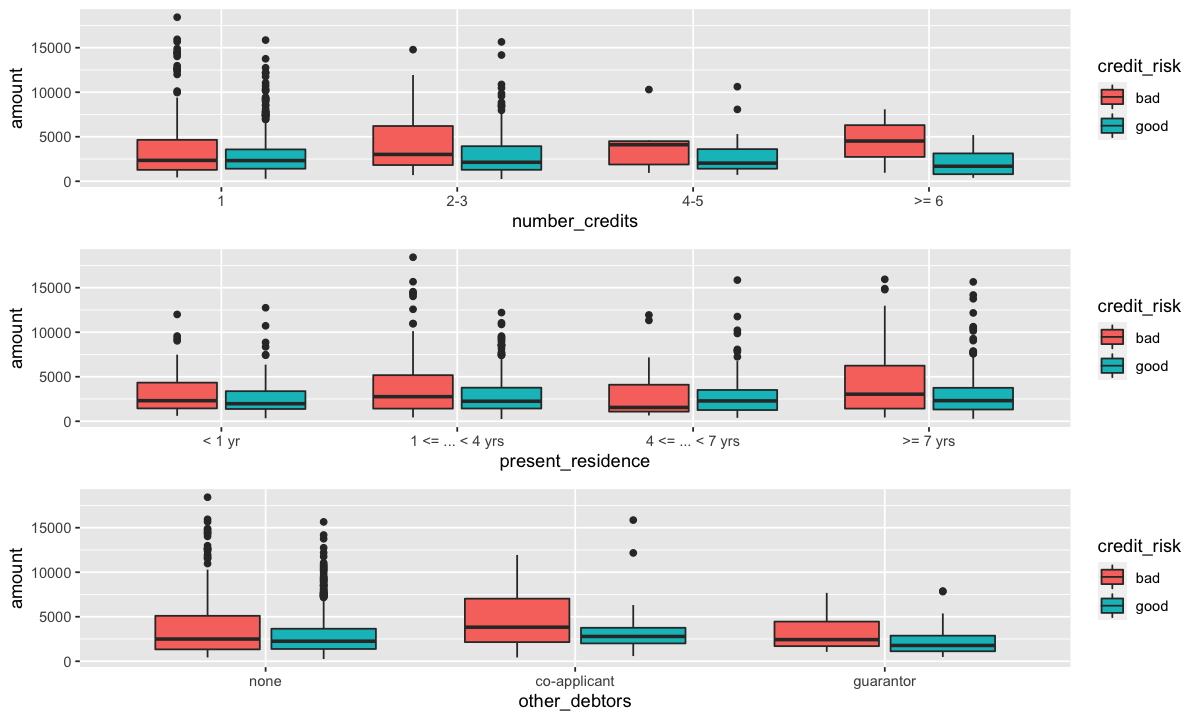

In [140]:
grid.arrange(number_credits_bp,present_residence_bp,other_debtors_bp)

## Variable catégorielles

### Exercices


Faites une analyse de variable catégotrielles suivantes:
1. Status
2. Credit_history
3. Purpose

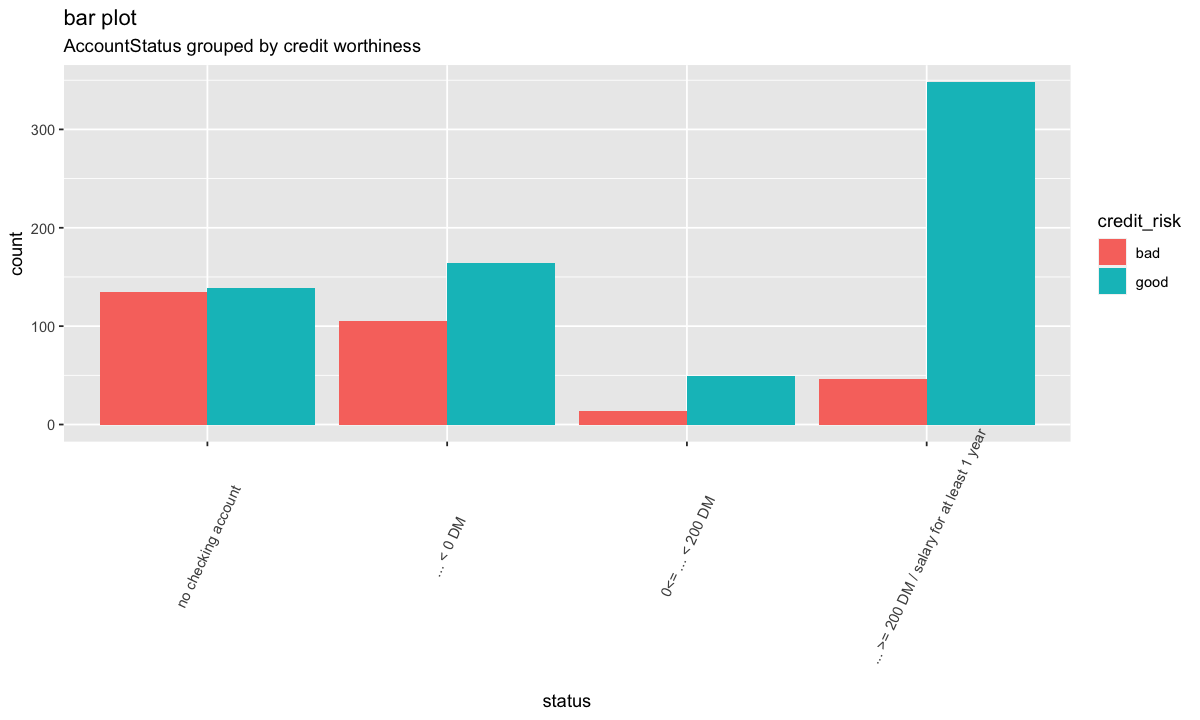

In [145]:
ggplot(german, aes(status, ..count..)) + 
theme(axis.text.x = element_text(angle=65, vjust=0.6)) + 
  geom_bar(aes(fill = credit_risk), position = "dodge") +
  labs(title="bar plot", subtitle="Statut des comptes regroupés par solvabilité")

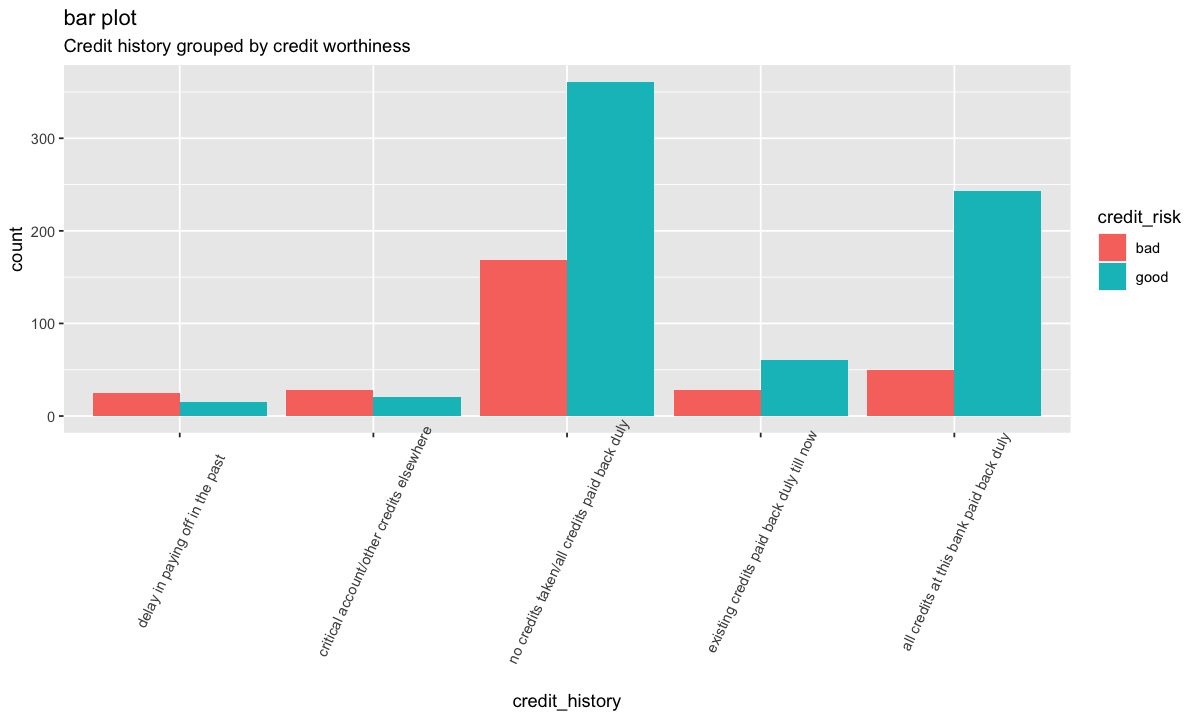

In [144]:
german %>% 
  ggplot(aes(credit_history, ..count..)) +
    theme(axis.text.x = element_text(angle=65, vjust=0.6)) + 
  geom_bar(aes(fill=credit_risk), position ="dodge") +
  labs(title="bar plot", subtitle="Antécédents de crédit regroupés par solvabilité")

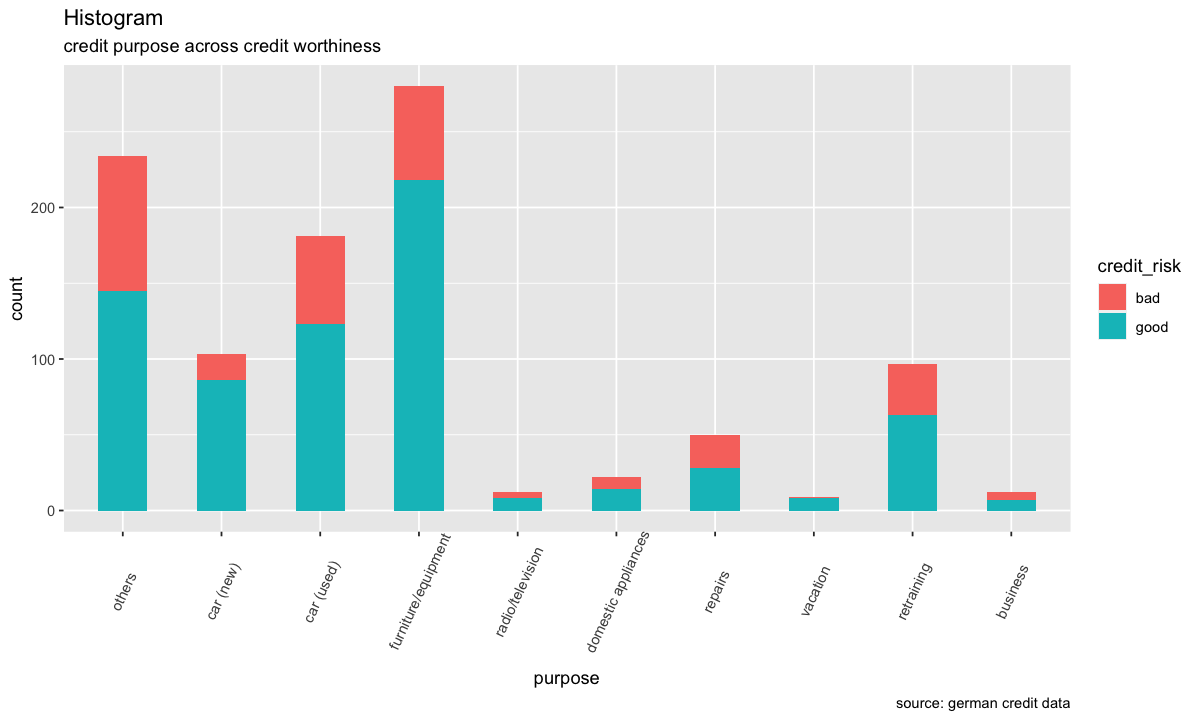

In [143]:
german %>% 
  ggplot(aes(purpose)) +
  geom_bar(aes(fill=credit_risk), width = 0.5) + 
  theme(axis.text.x = element_text(angle=65, vjust=0.6)) + 
  labs(title="Histogram", 
       subtitle="Motif du crédit en fonction de la solvabilité",
       caption = "source: german credit data")

# L'asymétrie

L'asymétrie est définie comme étant le troisième moment central normalisé. Vous pouvez facilement déterminer si une distribution est asymétrique par une simple visualisation. Il existe différentes façons de supprimer l'asymétrie, comme la transformation logarithmique, la racine carrée ou l'inverse. Cependant, il est souvent difficile de déterminer à partir des graphiques quelle transformation est la plus appropriée pour corriger l'asymétrie. La procédure de Box-Cox a identifié automatiquement une transformation de la famille des transformations de puissance qui sont indexées par un paramètre $\lambda$.

Cette famille comprend :
* la transformation logarithmique ($\lambda=0$)
* la transformation carrée ($\lambda=2$)
* racine carrée ($\lambda=0.5$)
* inverse ($\lambda=-1$)

Nous avons utilisé la fonction preProcess() dans caret pour appliquer cette transformation en changeant l'argument méthode en BoxCox.

In [146]:
german.copy<-german

In [147]:
mySkew <- caret::preProcess(german.copy, method = c("BoxCox"))

In [148]:
mySkew

Created from 1000 samples and 21 variables

Pre-processing:
  - Box-Cox transformation (3)
  - ignored (18)

Lambda estimates for Box-Cox transformation:
0.1, -0.1, -0.7

In [149]:
mySkew$method

$BoxCox
[1] "duration" "amount"   "age"     

$ignore
 [1] "status"                  "credit_history"         
 [3] "purpose"                 "savings"                
 [5] "employment_duration"     "installment_rate"       
 [7] "personal_status_sex"     "other_debtors"          
 [9] "present_residence"       "property"               
[11] "other_installment_plans" "housing"                
[13] "number_credits"          "job"                    
[15] "people_liable"           "telephone"              
[17] "foreign_worker"          "credit_risk"

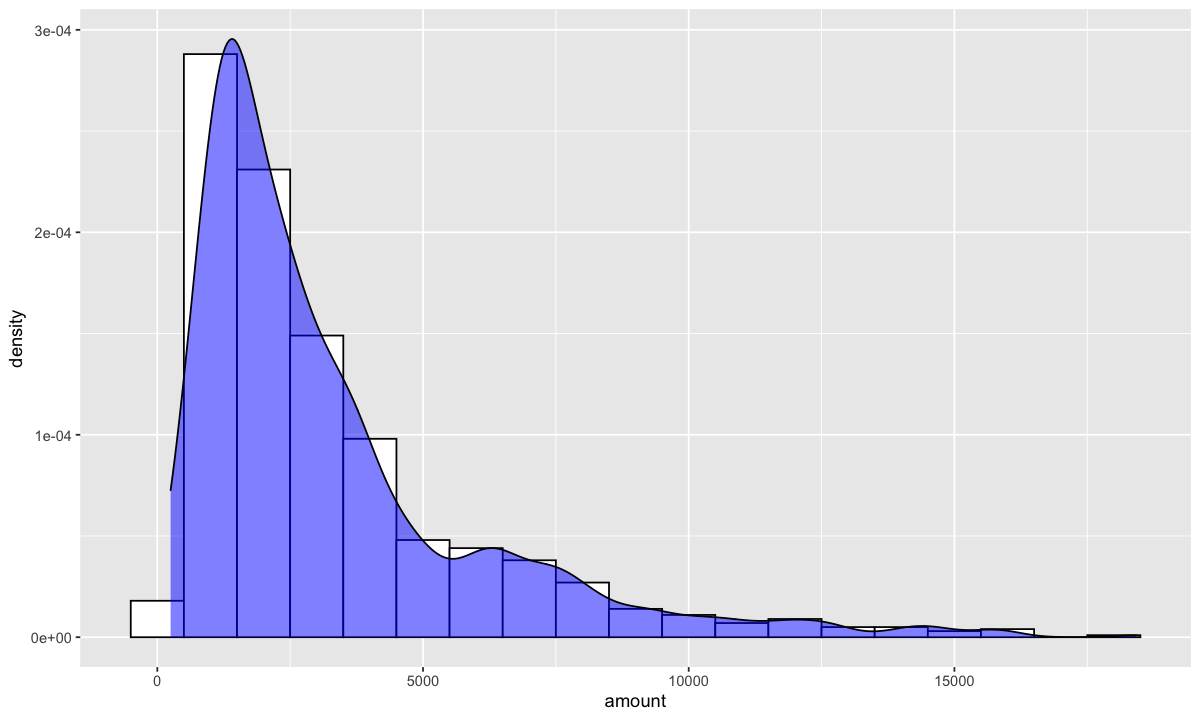

In [157]:
german.copy %>% 
  ggplot(aes(x=amount)) + 
  geom_histogram(aes(y=..density..), 
                 binwidth=1000,
                 colour="black", fill="white") +
  geom_density(alpha=.5, fill="blue")

In [152]:
myTransformed <- predict(mySkew, german.copy)

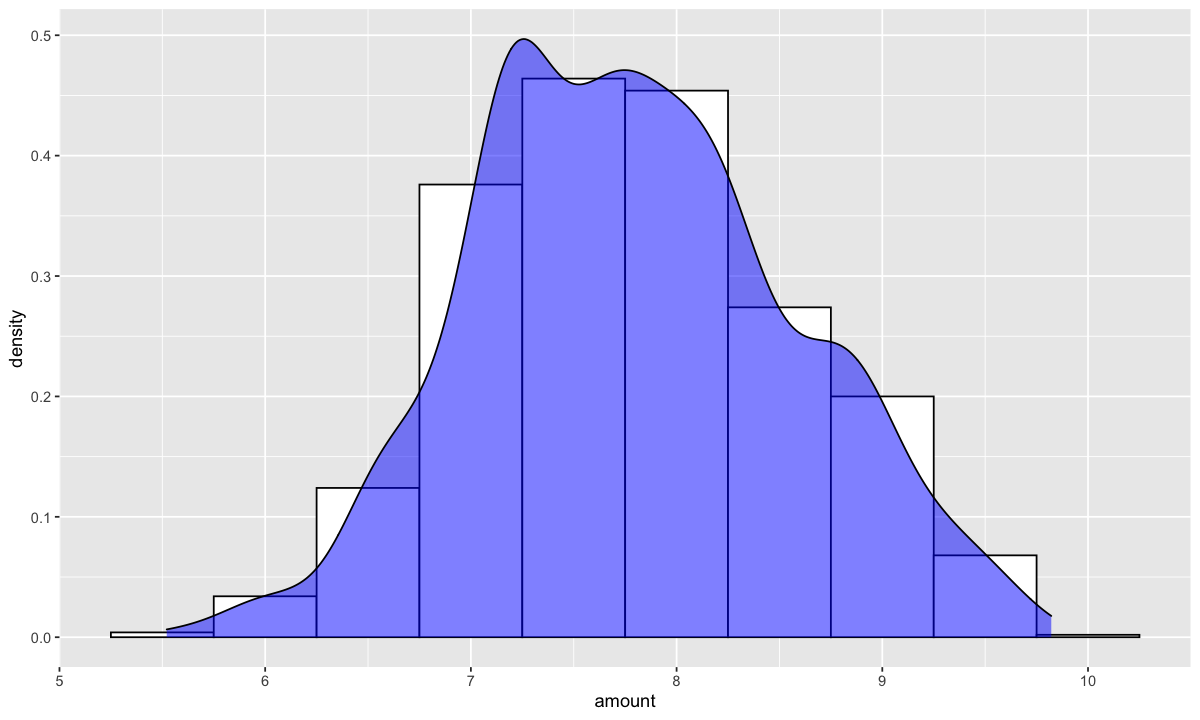

In [158]:
myTransformed %>% 
  ggplot(aes(x=amount)) + 
  geom_histogram(aes(y=..density..),
                 binwidth=.5,
                 colour="black", fill="white") +
  geom_density(alpha=.5, fill="blue")